In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="white", font_scale=1.5)


In [2]:
data_folder = "../data/2022-05-19_pilot"
df = pd.read_csv(os.path.join(data_folder, 'data_pilot1.csv'), index_col=[0])
df['total_ex'] = df['heads'] + df['tails']
df['mean'] = df['heads'] / (df['heads'] + df['tails'])
df['trial'] = df['block_type'] + df['trial_num'].apply(lambda x: str(x))
df.loc[(df['student_class'] == 'A') | (
    df['student_class'] == 'B'), 'student_experience'] = 'less'
df.loc[(df['student_class'] == 'C') | (
    df['student_class'] == 'D'), 'student_experience'] = 'more'
df['theta'] = df['true_theta'] # for plotting purposes
df


,subject_id,student_idx,block_type,trial_num,true_theta,student_a,student_b,student_class,heads,tails,student_guess,error,bonus,total_ex,mean,trial,student_experience,theta
0,A10BH9PYCYUKDJ,0,nonSeqPartial,0,0.5,8,2,D,5,5,0.650000,0.150000,0.00,10,0.500000,nonSeqPartial0,more,0.5
1,A10BH9PYCYUKDJ,1,nonSeqPartial,0,0.2,8,2,D,0,1,0.727273,0.527273,0.00,1,0.000000,nonSeqPartial0,more,0.2
2,A10BH9PYCYUKDJ,2,nonSeqFull,0,0.2,8,2,D,3,1,0.785714,0.585714,0.00,4,0.750000,nonSeqFull0,more,0.2
3,A10BH9PYCYUKDJ,3,nonSeqFull,0,0.5,4,1,B,15,15,0.542857,0.042857,0.20,30,0.500000,nonSeqFull0,less,0.5
4,A10BH9PYCYUKDJ,4,seqNoFeedback,0,0.8,8,2,D,20,10,NaN,NaN,NaN,30,0.666667,seqNoFeedback0,more,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,AZNIEFUIVB2H0,20,nonSeqPartial,0,0.5,8,2,D,6,6,0.636364,0.136364,0.00,12,0.500000,nonSeqPartial0,more,0.5
1095,AZNIEFUIVB2H0,21,seqFeedback,0,0.2,1,4,A,0,8,0.076923,NaN,NaN,8,0.000000,seqFeedback0,less,0.2
1096,AZNIEFUIVB2H0,21,seqFeedback,1,0.2,1,4,A,0,7,0.050000,0.150000,0.00,7,0.000000,seqFeedback1,less,0.2
1097,AZNIEFUIVB2H0,22,nonSeqPartial,0,0.8,1,4,A,2,8,0.200000,0.600000,0.00,10,0.200000,nonSeqPartial0,less,0.8


Check performance of four different conditions

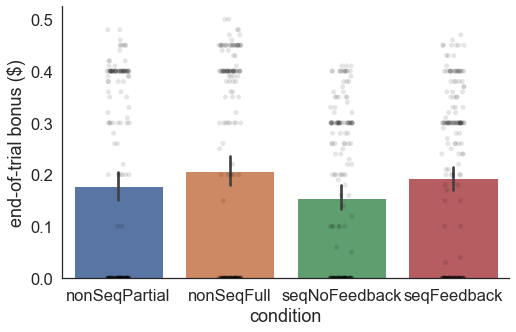

In [3]:
f, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df, x='block_type', y='bonus')
sns.stripplot(data=df, x='block_type', y='bonus', color='black', alpha=0.1)
ax.set(ylabel='end-of-trial bonus ($)', xlabel='condition')
sns.despine()


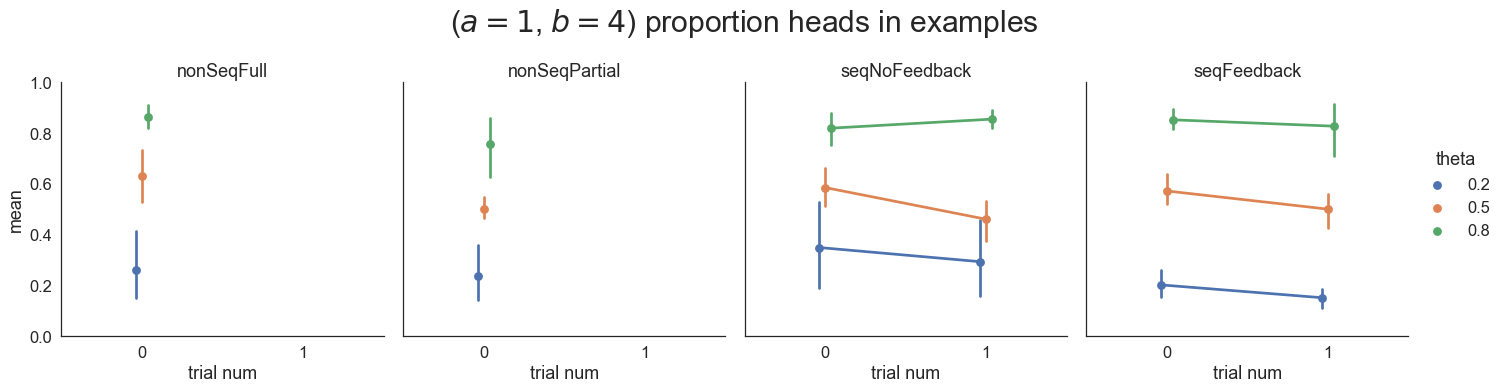

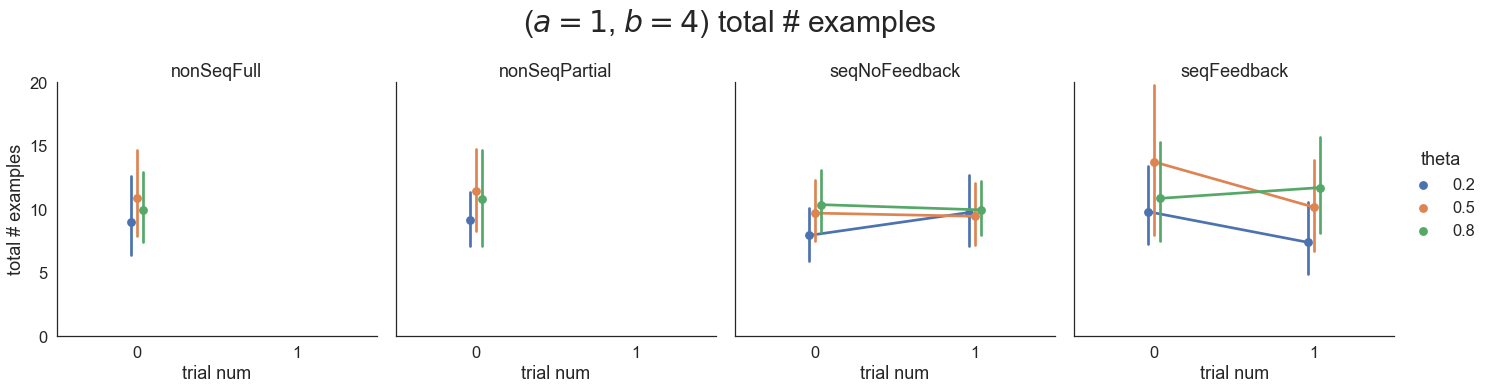

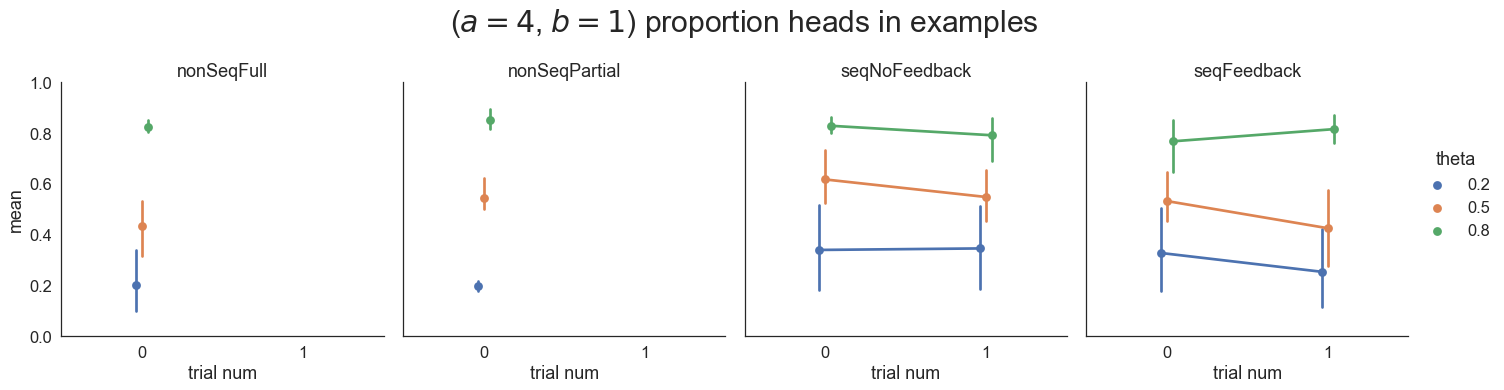

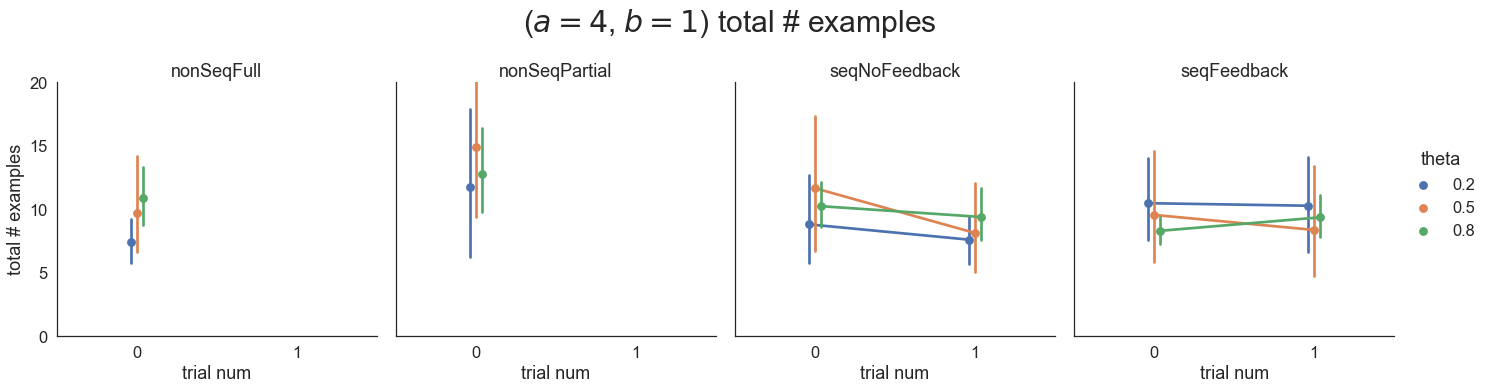

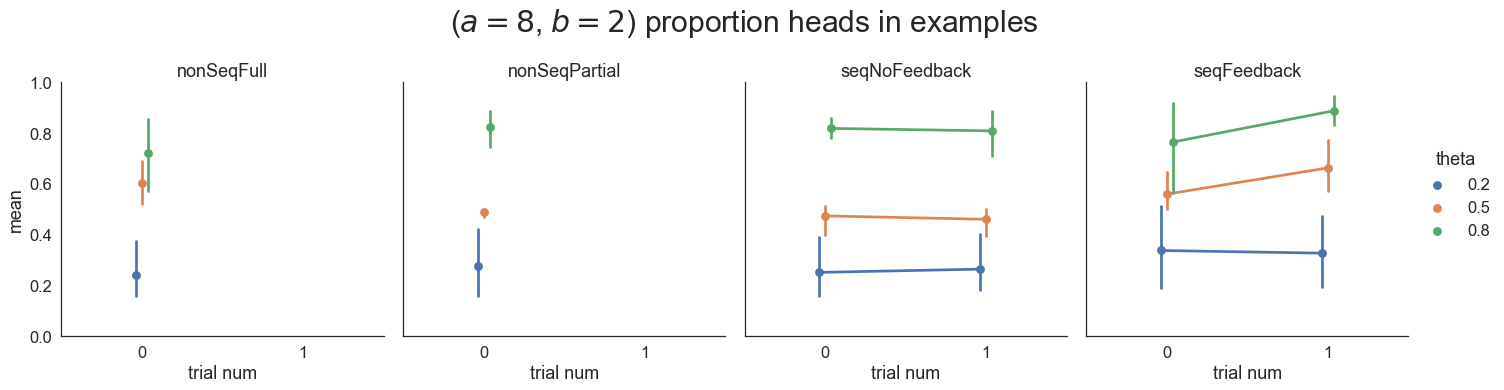

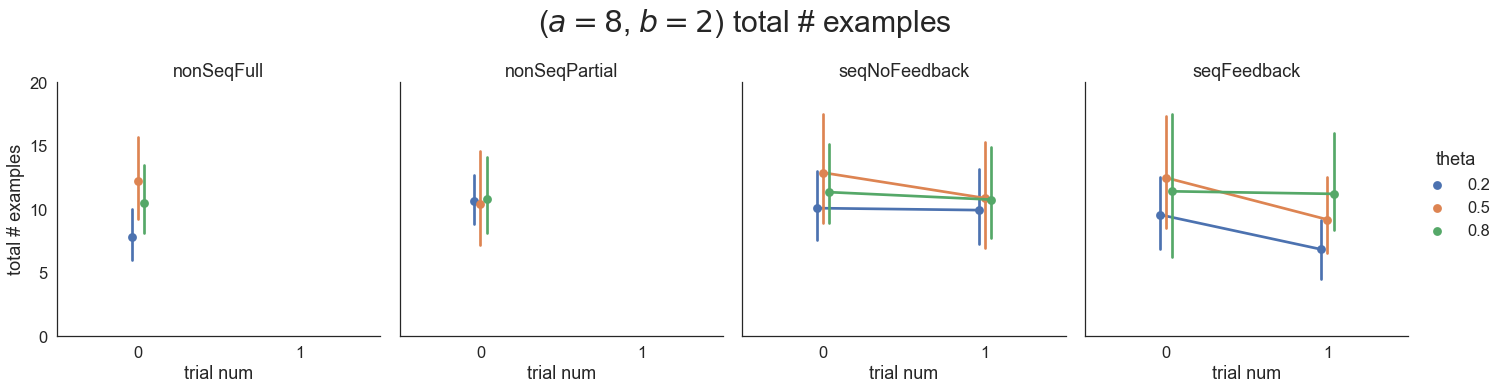

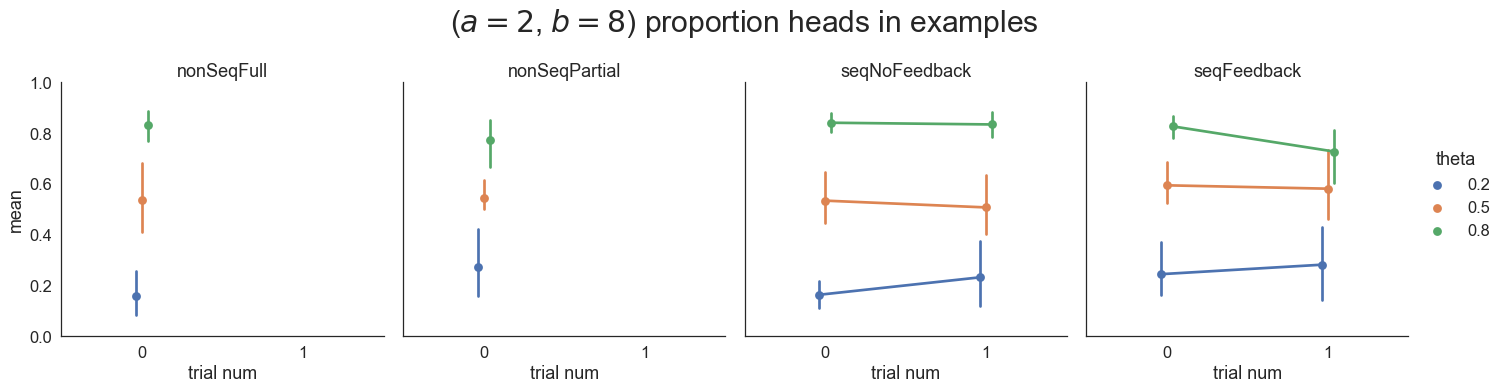

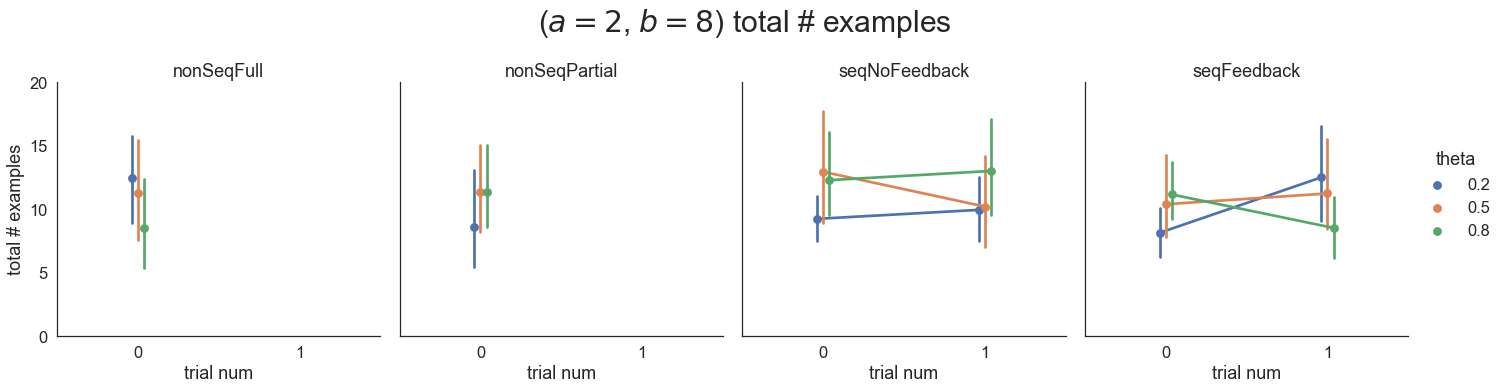

In [4]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=8$, $b=2$)",
    'D': "($a=2$, $b=8$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'])
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1))
     .figure.suptitle(hypers + " proportion heads in examples", y=1.1, size=30)
     )

    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'])
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 20))
     .set_titles("{col_name}")
     .figure.suptitle(hypers + " total # examples", y=1.1, size=30)
     )
